# Displaying the .mgf files as heatmaps using matplotlib

I will be reading the data into a list of lists, rounding m/z to 3 decimals.

Format is `[m/z value,[[spectrum 1,intensity]]],[m/z value,[[spectrum 2,intensity]]]`

Then sort.

Then merge into `[m/z value,[[spectrum 1,intensity],[spectrum 2,intensity],[etc]]]`

Read those values into a numpy array.

Plot using imshow.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections
myData='P20161026-01.mgf'
newData={}
count=1
size=0
pep=752 #the peptide mass that signifies the swath
read=' '
maxi=0

In [2]:
'''
While the read variable is still reading data in the file, get the spectrum number. 
If the spectrum has the correct pepmass, read in the data until the spectrum ends.
Round the data to 3 decimals and put them into a dictionary with the keys being the m/z values.
Print progress bar.
'''

dataset=open(myData)

print('Reading Data')

while(''!=read):
    read=dataset.readline()
    if('Spectrum'+str(count) in read): #count is the spectrum number
        count+=1
        if(count%220==0): #progress bar
            print(int(count/220),end='...')
        if(count%2200==0): 
            print()
    if('PEPMASS='+str(pep) in read): #checking for pepmass=pep
        size+=1
        while('END' not in read):
            read=dataset.readline()
            if('.' in read):
                [x,y]=read.split(' ') #split the string of two numbers into x and y
                x=np.round(float(x),0) #round both
                y=np.log2(np.round(float(y),3))
                if(y>maxi):
                    maxi=y
                temp=[count-1,y] #create a list from the spectrum number and the intensity value (y)
                newData.setdefault(x,[]).append(temp) #put that list to the appropriate m/z key (x)

dataset.close()

Reading Data
1...2...3...4...5...6...7...8...9...10...
11...12...13...14...15...16...17...18...19...20...
21...22...23...24...25...26...27...28...29...30...
31...32...33...34...35...36...37...38...39...40...
41...42...43...44...45...46...47...48...49...50...
51...52...53...54...55...56...57...58...59...60...
61...62...63...64...65...66...67...68...69...70...
71...72...73...74...75...76...77...78...79...80...
81...82...83...84...85...86...87...88...89...90...
91...92...93...94...95...96...97...98...99...

In [4]:
'''
Run through the dictionary of lists and place the intensity values into an array.
'''

print('Sorting Data')

newData=collections.OrderedDict(sorted(newData.items())) #this sorts the data by key value
index=-1
intensity=np.zeros([len(newData),size]) #create a new array of size m/z by number of spectra
charge=np.zeros(len(newData))
for key in newData.keys(): #for each m/z
    index+=1
    charge[index]=key
    for i in range(size): #for each spectrum
        try:
            intensity[index][(newData[key][i][0])]=((newData[key][i][1])/maxi) #put the intensity into the array
        except IndexError:
            break
mini=charge[0]
maxi=charge[-1]

Sorting Data


Plotting Data


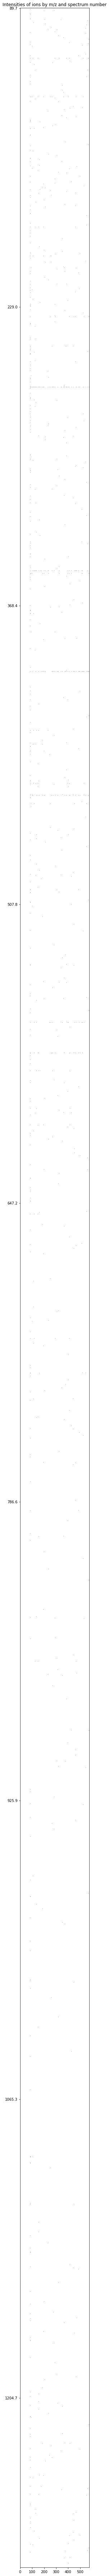

In [10]:
'''
Plot
'''

print('Plotting Data')

fig,ax=plt.subplots(figsize=(60,15))
im=ax.imshow(intensity,cmap='Greys')

y=ax.get_yticks()
y=y/y[-1]*(maxi-mini)
y+=mini
y=np.round(y,0)

ax.set_yticklabels(y)

ax.set_title('Intensities of ions by m/z and spectrum number')
fig.tight_layout()
plt.show()